In [42]:
from meta import ROOT_DIR
from bez.segments import segments
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Skeleton extraction
## Trapped-ball segmentation
### Decorative Line Detection
#### Detection de points centraux des lignes : 
+ Convolution avec un "second derivative of a Gaussian"
+ detections des maximas locaux : nonmax-ima suppression as in the original Canny edge detector
+ Récupère en même temps la direction de la ligne

####

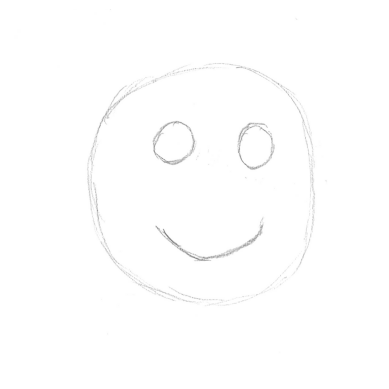

Max line width: 9


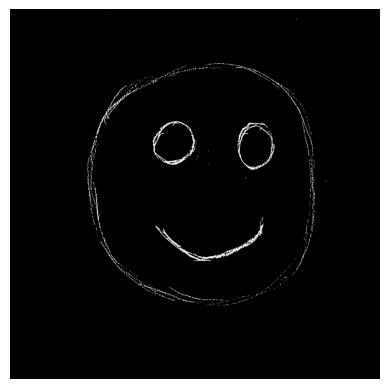

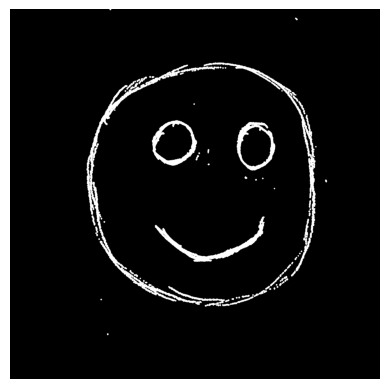

[False  True]


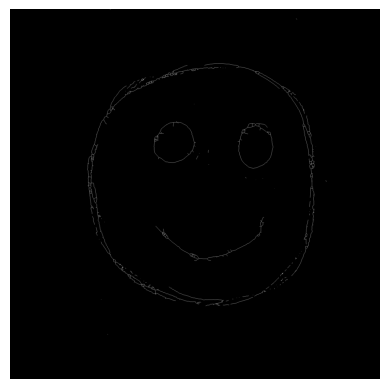

In [90]:
# Skeleton extraction
from skimage.morphology import skeletonize, dilation, erosion, remove_small_holes
from skimage.morphology import disk
from skimage.filters import threshold_otsu

test_image = io.imread(ROOT_DIR /"data/sketches/smiley.png")
test_image = test_image[:, :, 0]  

plt.imshow(test_image, cmap="gray")
plt.axis("off")
plt.show()

t = threshold_otsu(test_image)
test_image_binary = test_image < t

thicknesses = np.zeros_like(test_image_binary)

c = 1
max_line_width_detection = test_image_binary.copy()
while np.sum(max_line_width_detection) > 0:
    # iterate the erosion
    tmp = erosion(max_line_width_detection, disk(1))
    # find the difference
    diff = max_line_width_detection ^ tmp > 0
    thicknesses[diff] = c
    max_line_width_detection = tmp
    c += 1

print(f"Max line width: {c}")

plt.imshow(thicknesses, cmap="gray")
plt.axis("off")
plt.show()

test_image_binary = dilation(test_image_binary, disk(c//2))

plt.imshow(test_image_binary, cmap="gray")
plt.axis("off")
plt.show()

skeleton = skeletonize(test_image_binary, method="zhang")
print(np.unique(skeleton))
plt.imshow(skeleton, cmap="gray")
plt.axis("off")
plt.show()

(array([3988871,       8,     226,    9563,       0,    1016,     251,
            49,      13,       3]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]))


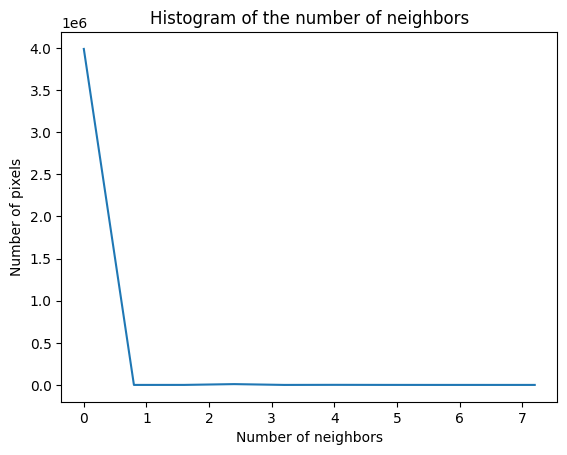

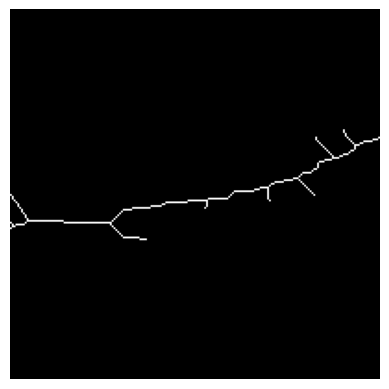

In [112]:
import scipy.signal



kernel = np.ones((3, 3), dtype=int)

n = scipy.signal.convolve2d(
    skeleton.astype(int), kernel, mode="same"
)
n*= skeleton
h = np.histogram(n)
print(h)
plt.plot(h[1][:-1], h[0])
plt.xlabel("Number of neighbors")
plt.ylabel("Number of pixels")
plt.title("Histogram of the number of neighbors")
plt.show()

c = np.where(n == 8)

c = (1335, 1112)
sub_image = skeleton[c[0]-100:c[0]+100, c[1]-100:c[1]+100]
plt.imshow(sub_image, cmap="gray")
plt.axis("off")
plt.show()



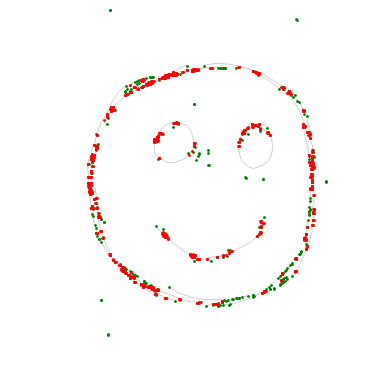

In [113]:
from matplotlib.colors import ListedColormap

plt.scatter(np.where(n == 2)[1], np.where(n == 2)[0], color="green", s=1)
plt.scatter(np.where(n >= 4)[1], np.where(n >= 4)[0], color="red", s=1)
plt.imshow(n, cmap=ListedColormap(["white", "white", "green", "black", "red", "white", "white", "white"]))
plt.axis("off")
plt.show()